In [3]:
# ensure that the imported .py file will get auto imported and updated whenever there is a change
%load_ext autoreload
%autoreload 2

# Num Of Epochs

First, we attempt to find the number of epochs that achieve the best training results.

In [4]:
import os, json
from BartSummarizer import train_model, load_json, test_model
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# MODEL_NAME = 'allenai/led-large-16384-arxiv'
# MODEL_NAME = 'allenai/led-base-16384'
MODEL_NAME = 'facebook/bart-large'
# MODEL_NAME = 'facebook/bart-large-cnn'

d:\miniconda3\envs\main\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:

all_metrics = []
model, tokenizer, metrics = None, None, []
def tweak_num_epochs(num_epochs):
  model, tokenizer, metrics = train_model(MODEL_NAME, num_epochs=num_epochs, learning_rate=5e-5)
  all_metrics.append(metrics)

for i in range(1, 11):
  # Using default learning rate
  tweak_num_epochs(num_epochs=i)

Map: 100%|██████████| 174/174 [00:00<00:00, 238.54 examples/s]
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
                                               
100%|██████████| 88/88 [00:21<00:00,  4.05it/s]


{'train_runtime': 21.7007, 'train_samples_per_second': 32.119, 'train_steps_per_second': 4.055, 'train_loss': 5.1764210787686435, 'epoch': 1.0}


100%|██████████| 22/22 [00:01<00:00, 16.76it/s]


{'eval_loss': 3.165081262588501, 'eval_runtime': 1.385, 'eval_samples_per_second': 125.632, 'eval_steps_per_second': 15.885, 'epoch': 1.0}


Map: 100%|██████████| 174/174 [00:00<00:00, 240.96 examples/s]
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
                                               
1

{'train_runtime': 43.2112, 'train_samples_per_second': 32.26, 'train_steps_per_second': 4.073, 'train_loss': 3.0066004666415127, 'epoch': 2.0}


100%|██████████| 22/22 [00:01<00:00, 17.11it/s]


{'eval_loss': 1.0864142179489136, 'eval_runtime': 1.3589, 'eval_samples_per_second': 128.041, 'eval_steps_per_second': 16.189, 'epoch': 2.0}


Map: 100%|██████████| 174/174 [00:00<00:00, 241.94 examples/s]
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in

{'train_runtime': 62.0462, 'train_samples_per_second': 33.701, 'train_steps_per_second': 4.255, 'train_loss': 2.1560465494791665, 'epoch': 3.0}


100%|██████████| 22/22 [00:01<00:00, 16.19it/s]


{'eval_loss': 1.0044134855270386, 'eval_runtime': 1.4309, 'eval_samples_per_second': 121.599, 'eval_steps_per_second': 15.375, 'epoch': 3.0}


Map: 100%|██████████| 174/174 [00:00<00:00, 242.90 examples/s]
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in

{'train_runtime': 82.9195, 'train_samples_per_second': 33.623, 'train_steps_per_second': 4.245, 'train_loss': 1.7848184758966619, 'epoch': 4.0}


100%|██████████| 22/22 [00:01<00:00, 16.11it/s]


{'eval_loss': 1.0150978565216064, 'eval_runtime': 1.4369, 'eval_samples_per_second': 121.091, 'eval_steps_per_second': 15.31, 'epoch': 4.0}


Map: 100%|██████████| 174/174 [00:00<00:00, 239.42 examples/s]
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in

{'train_runtime': 103.7048, 'train_samples_per_second': 33.605, 'train_steps_per_second': 4.243, 'train_loss': 1.5742785367098722, 'epoch': 5.0}


100%|██████████| 22/22 [00:01<00:00, 16.33it/s]


{'eval_loss': 1.0490833520889282, 'eval_runtime': 1.4205, 'eval_samples_per_second': 122.493, 'eval_steps_per_second': 15.488, 'epoch': 5.0}


Map: 100%|██████████| 174/174 [00:00<00:00, 240.73 examples/s]
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in

{'loss': 1.5167, 'grad_norm': 1.744562029838562, 'learning_rate': 2.651515151515152e-06, 'epoch': 5.68}


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
                                               
100%|██████████| 528/528 [02:05<00:00,  4.21it/s]


{'train_runtime': 125.3411, 'train_samples_per_second': 33.365, 'train_steps_per_second': 4.213, 'train_loss': 1.46729770934943, 'epoch': 6.0}


100%|██████████| 22/22 [00:01<00:00, 16.16it/s]


{'eval_loss': 1.0689201354980469, 'eval_runtime': 1.4359, 'eval_samples_per_second': 121.18, 'eval_steps_per_second': 15.322, 'epoch': 6.0}


Map: 100%|██████████| 174/174 [00:00<00:00, 239.12 examples/s]
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in

{'loss': 1.5166, 'grad_norm': 1.7076444625854492, 'learning_rate': 9.415584415584416e-06, 'epoch': 5.68}


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
                                               
100%|██████████| 616/616 [02:25<00:00,  4.24it/s]


{'train_runtime': 145.2945, 'train_samples_per_second': 33.58, 'train_steps_per_second': 4.24, 'train_loss': 1.3307865997413537, 'epoch': 7.0}


100%|██████████| 22/22 [00:01<00:00, 16.17it/s]


{'eval_loss': 1.0939221382141113, 'eval_runtime': 1.4318, 'eval_samples_per_second': 121.529, 'eval_steps_per_second': 15.366, 'epoch': 7.0}


Map: 100%|██████████| 174/174 [00:00<00:00, 242.66 examples/s]
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in

{'loss': 1.4769, 'grad_norm': 1.6922041177749634, 'learning_rate': 1.4488636363636366e-05, 'epoch': 5.68}


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file

{'train_runtime': 167.7915, 'train_samples_per_second': 33.232, 'train_steps_per_second': 4.196, 'train_loss': 1.1887292645194314, 'epoch': 8.0}


100%|██████████| 22/22 [00:01<00:00, 16.17it/s]


{'eval_loss': 1.141263723373413, 'eval_runtime': 1.4326, 'eval_samples_per_second': 121.46, 'eval_steps_per_second': 15.357, 'epoch': 8.0}


Map: 100%|██████████| 174/174 [00:00<00:00, 243.34 examples/s]
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in

{'loss': 1.453, 'grad_norm': 5.153441905975342, 'learning_rate': 1.8434343434343433e-05, 'epoch': 5.68}


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file

{'train_runtime': 187.1226, 'train_samples_per_second': 33.523, 'train_steps_per_second': 4.233, 'train_loss': 1.082371104847301, 'epoch': 9.0}


100%|██████████| 22/22 [00:01<00:00, 16.17it/s]


{'eval_loss': 1.2218152284622192, 'eval_runtime': 1.4349, 'eval_samples_per_second': 121.261, 'eval_steps_per_second': 15.332, 'epoch': 9.0}


Map: 100%|██████████| 174/174 [00:00<00:00, 243.53 examples/s]
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in

{'loss': 1.608, 'grad_norm': 1.683561086654663, 'learning_rate': 2.1590909090909093e-05, 'epoch': 5.68}


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file

{'train_runtime': 207.7329, 'train_samples_per_second': 33.553, 'train_steps_per_second': 4.236, 'train_loss': 1.0948183233087714, 'epoch': 10.0}


100%|██████████| 22/22 [00:01<00:00, 17.01it/s]

{'eval_loss': 1.2239481210708618, 'eval_runtime': 1.3669, 'eval_samples_per_second': 127.296, 'eval_steps_per_second': 16.095, 'epoch': 10.0}
[{'eval_loss': 3.165081262588501, 'eval_runtime': 1.385, 'eval_samples_per_second': 125.632, 'eval_steps_per_second': 15.885, 'epoch': 1.0}, {'eval_loss': 1.0864142179489136, 'eval_runtime': 1.3589, 'eval_samples_per_second': 128.041, 'eval_steps_per_second': 16.189, 'epoch': 2.0}, {'eval_loss': 1.0044134855270386, 'eval_runtime': 1.4309, 'eval_samples_per_second': 121.599, 'eval_steps_per_second': 15.375, 'epoch': 3.0}, {'eval_loss': 1.0150978565216064, 'eval_runtime': 1.4369, 'eval_samples_per_second': 121.091, 'eval_steps_per_second': 15.31, 'epoch': 4.0}, {'eval_loss': 1.0490833520889282, 'eval_runtime': 1.4205, 'eval_samples_per_second': 122.493, 'eval_steps_per_second': 15.488, 'epoch': 5.0}, {'eval_loss': 1.0689201354980469, 'eval_runtime': 1.4359, 'eval_samples_per_second': 121.18, 'eval_steps_per_second': 15.322, 'epoch': 6.0}, {'eval_lo

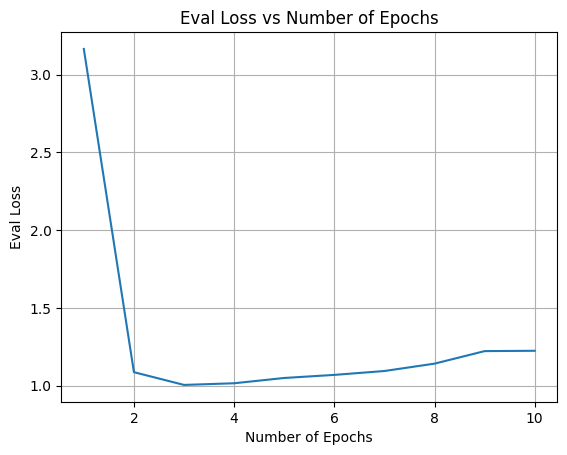

In [4]:
# metrics from previous trainings
metrics = [{'eval_loss': 3.165081262588501, 'eval_runtime': 1.385, 'eval_samples_per_second': 125.632, 'eval_steps_per_second': 15.885, 'epoch': 1.0}, {'eval_loss': 1.0864142179489136, 'eval_runtime': 1.3589, 'eval_samples_per_second': 128.041, 'eval_steps_per_second': 16.189, 'epoch': 2.0}, {'eval_loss': 1.0044134855270386, 'eval_runtime': 1.4309, 'eval_samples_per_second': 121.599, 'eval_steps_per_second': 15.375, 'epoch': 3.0}, {'eval_loss': 1.0150978565216064, 'eval_runtime': 1.4369, 'eval_samples_per_second': 121.091, 'eval_steps_per_second': 15.31, 'epoch': 4.0}, {'eval_loss': 1.0490833520889282, 'eval_runtime': 1.4205, 'eval_samples_per_second': 122.493, 'eval_steps_per_second': 15.488, 'epoch': 5.0}, {'eval_loss': 1.0689201354980469, 'eval_runtime': 1.4359, 'eval_samples_per_second': 121.18, 'eval_steps_per_second': 15.322, 'epoch': 6.0}, {'eval_loss': 1.0939221382141113, 'eval_runtime': 1.4318, 'eval_samples_per_second': 121.529, 'eval_steps_per_second': 15.366, 'epoch': 7.0}, {'eval_loss': 1.141263723373413, 'eval_runtime': 1.4326, 'eval_samples_per_second': 121.46, 'eval_steps_per_second': 15.357, 'epoch': 8.0}, {'eval_loss': 1.2218152284622192, 'eval_runtime': 1.4349, 'eval_samples_per_second': 121.261, 'eval_steps_per_second': 15.332, 'epoch': 9.0}, {'eval_loss': 1.2239481210708618, 'eval_runtime': 1.3669, 'eval_samples_per_second': 127.296, 'eval_steps_per_second': 16.095, 'epoch': 10.0}]

epochs = range(1, 11)
data = [metric['eval_loss'] for metric in metrics]
plt.plot(epochs, data)

plt.xlabel("Number of Epochs")
plt.ylabel("Eval Loss")
plt.title("Eval Loss vs Number of Epochs")
plt.grid(True)
plt.show()

# Learning Rate

Next we fix the other hyperparameters and tweak the learning rate

In [6]:
model, tokenizer, metrics = None, None, []
def tweak_learning_rate(learning_rates):
  results = []
  for learning_rate in learning_rates:
    model, tokenizer, metrics = train_model(MODEL_NAME, num_epochs=1, learning_rate=learning_rate)
    results.append((model, tokenizer, metrics))
  return results

learning_rates = [
  5e-2, 
  5e-3, 
  5e-4, 
  5e-5, 
  5e-6,
  5e-7,
  5e-8,
  5e-9,
  5e-10,
]

results = tweak_learning_rate(learning_rates)
print(results)


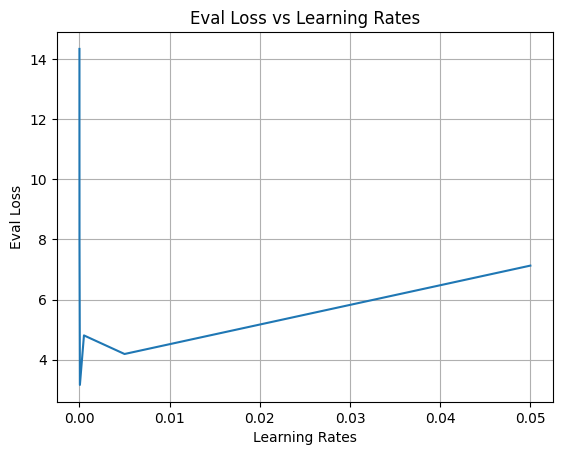

In [7]:
# Recorded results from previous trainings
learning_rate_metrics = [
  {'eval_loss': 7.129705429077148, 'eval_runtime': 1.3286, 'eval_samples_per_second': 130.964, 'eval_steps_per_second': 16.559, 'epoch': 1.0},
  {'eval_loss': 4.191491603851318, 'eval_runtime': 1.3749, 'eval_samples_per_second': 126.557, 'eval_steps_per_second': 16.001, 'epoch': 1.0},
  {'eval_loss': 4.809343338012695, 'eval_runtime': 1.3561, 'eval_samples_per_second': 128.309, 'eval_steps_per_second': 16.223, 'epoch': 1.0},
  {'eval_loss': 3.163576364517212, 'eval_runtime': 1.4351, 'eval_samples_per_second': 121.244, 'eval_steps_per_second': 15.33, 'epoch': 1.0},
  {'eval_loss': 7.9258036613464355, 'eval_runtime': 1.4346, 'eval_samples_per_second': 121.286, 'eval_steps_per_second': 15.335, 'epoch': 1.0},
  {'eval_loss': 11.113795280456543, 'eval_runtime': 1.3722, 'eval_samples_per_second': 126.805, 'eval_steps_per_second': 16.033, 'epoch': 1.0},
  {'eval_loss': 13.939626693725586, 'eval_runtime': 24.0448, 'eval_samples_per_second': 7.236, 'eval_steps_per_second': 0.915, 'epoch': 1.0},
  {'eval_loss': 14.29739761352539, 'eval_runtime': 1.4558, 'eval_samples_per_second': 119.526, 'eval_steps_per_second': 15.112, 'epoch': 1.0},
  {'eval_loss': 14.332598686218262, 'eval_runtime': 5.2108, 'eval_samples_per_second': 33.392, 'eval_steps_per_second': 4.222, 'epoch': 1.0},
]

data = [
  metric['eval_loss']
  for metric in learning_rate_metrics
]
plt.plot(learning_rates, data)

plt.xlabel("Learning Rates")
plt.ylabel("Eval Loss")
plt.title("Eval Loss vs Learning Rates")
plt.grid(True)
plt.show()

# Test Model

The training results show that the lowest loss happens when:

* num_epochs is 3
* learning rate is 5e-5

Using these hyperparameters to test the model.

In [9]:
def do_testing(num_epochs, learning_rate):
  model, tokenizer, _ = train_model(MODEL_NAME, num_epochs=num_epochs, learning_rate=learning_rate)

  test_file_path =  os.path.join('../dataset/', 'dataset_test_ground_truth.json')   #20 pdfs
  test_data = load_json(test_file_path)
  test_loader = DataLoader(test_data, batch_size=1, shuffle=False)

  # Calculate average ROUGE scores across all sections
  all_results = []
  for item in test_loader:
      section_result = test_model(item, model, tokenizer)
      all_results.append(section_result)
  total_sections = len(all_results)
  print("total sections",total_sections)
  total_rouge1 = sum(result.get("ROUGE-1 F1", 0) for result in all_results)
  total_rouge2 = sum(result.get("ROUGE-2 F1", 0) for result in all_results)
  total_rougeL = sum(result.get("ROUGE-L F1", 0) for result in all_results)

  average_rouge1 = total_rouge1 / total_sections
  average_rouge2 = total_rouge2 / total_sections
  average_rougeL = total_rougeL / total_sections

  print("Average ROUGE-1 F1:", average_rouge1)
  print("Average ROUGE-2 F1:", average_rouge2)
  print("Average ROUGE-L F1:", average_rougeL)

  # Save results to JSON file
  with open(f"results/bart_large_results-num_epochs_{num_epochs}-learning_rate_{learning_rate}.json", "w") as json_file:
      json.dump(all_results, json_file, indent=4)


In [10]:
# Testing model using the epoch with the lowest eval loss
do_testing(3, 5e-5)

  0%|          | 0/264 [00:00<?, ?it/s]d:\miniconda3\envs\main\Lib\site-packages\transformers\models\bart\modeling_bart.py:587: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(
 33%|███▎      | 88/264 [00:17<00:31,  5.54it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
 66%|██████▋   | 175/264 [00:38<00:17,  4.99it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https

{'train_runtime': 66.0348, 'train_samples_per_second': 31.665, 'train_steps_per_second': 3.998, 'train_loss': 2.1505501487038354, 'epoch': 3.0}


100%|██████████| 22/22 [00:01<00:00, 17.37it/s]


{'eval_loss': 1.0028181076049805, 'eval_runtime': 1.4262, 'eval_samples_per_second': 122.001, 'eval_steps_per_second': 15.425, 'epoch': 3.0}
Section Name:  ['Abstract']
Generated Summary:  TheThe textkey-higson bijection is a one-to-one correspondence between
irreducible tempered representations of g group reductive group and irreducible
unitary representations of the cartan motion group. The correspondence discusses
facts facts about the topology of the tempered dual e the unitary dual, the mac
bi, It confirms that the mackey-higson bijection is these tempered groups is
continuous.
Section Name:  ['1. Introduction']
Generated Summary:   text discusses the existencekey-Higson bijection between e tempered dual and
unitary dual of a connected reductive algebraic group. a finite plane r The
research has proven that natural-to-one correspondence between these groupss,
which the for representation theory. group c-algebras. The existencejection is
which not a haomorphism, is implications imp